In [ ]:
!gdown --id 1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5

Downloading...
From: https://drive.google.com/uc?id=1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5
To: /content/Sunspots.csv
100% 70.8k/70.8k [00:00<00:00, 24.1MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('Sunspots.csv')
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3230,3230,2018-03-31,2.5
3231,3231,2018-04-30,8.9
3232,3232,2018-05-31,13.2
3233,3233,2018-06-30,15.9


In [ ]:
len(df)

3235

In [ ]:
df.isnull().sum()

Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

Text(0.5, 1.0, 'Average Sunspots Numbers')

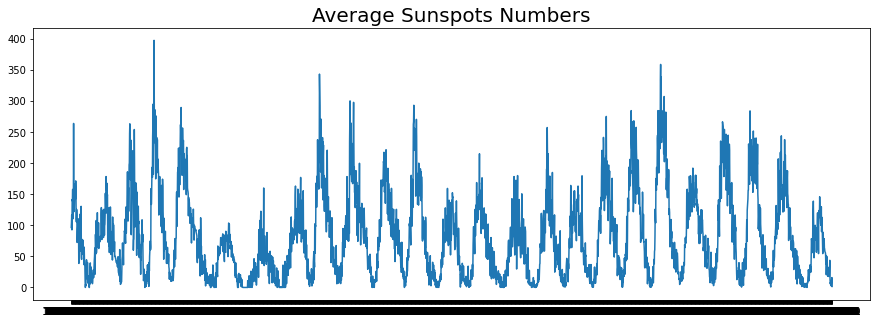

In [ ]:
import matplotlib.pyplot as plt

dates = df['Date'].values
series = df['Monthly Mean Total Sunspot Number'].values


plt.figure(figsize=(15,5))
plt.plot(dates, series)
plt.title('Average Sunspots Numbers',
          fontsize=20)

In [ ]:
split_time = int(0.8*len(df))
df_train = series[:split_time]
df_test = series[split_time:]

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
import tensorflow as tf

train_set = windowed_dataset(df_train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(df_test, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(60, return_sequences=True),
                                    tf.keras.layers.LSTM(60),
                                    tf.keras.layers.Dense(30, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs ={}): 
        if(logs.get('mae')< 24 and logs.get('val_mae')< 24): 
            print("\n <6% mae reached")
            self.model.stop_training = True
callbacks = MyCallbacks()

In [ ]:
history = model.fit(train_set,
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[callbacks])
                    

Epoch 1/100
26/26 [==============================] - 6s 71ms/step - loss: 79.9669 - mae: 80.4532 - val_loss: 86.9193 - val_mae: 87.4170
Epoch 2/100
26/26 [==============================] - 1s 39ms/step - loss: 79.6926 - mae: 80.1809 - val_loss: 86.6544 - val_mae: 87.1509
Epoch 3/100
26/26 [==============================] - 1s 39ms/step - loss: 79.4321 - mae: 79.9229 - val_loss: 86.3782 - val_mae: 86.8742
Epoch 4/100
26/26 [==============================] - 1s 38ms/step - loss: 79.1537 - mae: 79.6468 - val_loss: 86.0645 - val_mae: 86.5607
Epoch 5/100
26/26 [==============================] - 1s 39ms/step - loss: 78.8306 - mae: 79.3253 - val_loss: 85.6919 - val_mae: 86.1871
Epoch 6/100
26/26 [==============================] - 1s 39ms/step - loss: 78.4391 - mae: 78.9350 - val_loss: 85.2280 - val_mae: 85.7241
Epoch 7/100
26/26 [==============================] - 1s 39ms/step - loss: 77.9433 - mae: 78.4396 - val_loss: 84.6291 - val_mae: 85.1257
Epoch 8/100
26/26 [=============================

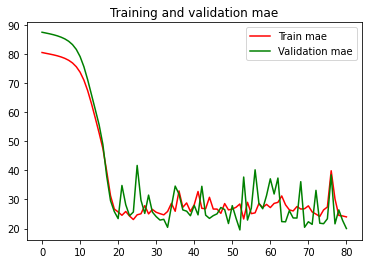

<Figure size 432x288 with 0 Axes>

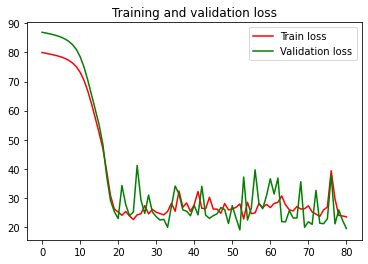

<Figure size 432x288 with 0 Axes>

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'r', label='Train mae')
plt.plot(epochs, val_mae, 'g', label='Validation mae')
plt.title('Training and validation mae')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()